# Name(s):

# Assignment 4: Clustering

In this assignment we'll be looking at three popular types of clustering algorithms -- K-Means clustering, Density Based clustering, and Hierarchical clustering. We'll also look at some measures of cluster quality like cohesion, separation and silhoutte coefficient.

## Part 1: Implement K Means Clustering

In k-means clustering you are given a dataset and a hyperparameter, k, specifying the number of desired clusters. The objective function of k-means is to minimize the sum of squared error (SSE) of the output clusters. Unfortunately, the solution to this problem is NP Hard. In this assignment we'll be implementing the iterative algorithm that produces the locally optimal solution to this problem but guarantees convergence.

In [52]:
# Some headers
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame
from sklearn.manifold import MDS
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist


In [3]:
# Enable inline mode for matplotlib so that Jupyter displays plots
%matplotlib inline

450


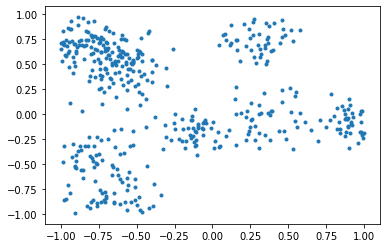

In [4]:
# Get data from file
data = np.genfromtxt("data_kmeans.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')
print(len(data))

Q1. Implement the function `generate_clusters` that returns clusters, given the cluster centroids (`mu`) and the dataset (`data`). Each datapoint needs to be associated to the closest cluster centroid. You may return this in any format/data structure you think is appropriate.

In [5]:
def generate_clusters(data, mu):
    # your code goes here
    for point in data: 
        best_dist = None
        my_mu = None
        for centroid in mu:
            dist = euclidean_dist(point, centroid)
            if best_dist == None or best_dist > dist:
                best_dist = dist
                my_mu = centroid
        point.update_mu(my_mu)
    # MU == list of the Centroids
    # Data == is our data
    # We need to mark every datapoint as belonging to the centroid nearest to them. 
    
    # Ideas of implementation
#         - Centroids would be keys, and the clusters would be the values
#         - Each cluster would be a list of all of the points in that cluster
    return data 

def euclidean_dist(point_a, point_b):
    return np.sqrt(np.power(point_a.x - point_b.x, 2) + np.power(point_a.y - point_b.y, 2))

Q2. Implement the function `recompute_centroids` that returns the centroids given a set of input clusters. Hint: you need to calculate the mean for each cluster.

In [6]:
def recompute_centroids(clusters):
    # your code goes here
    dict = {}
    new_mus = []
    for point in clusters:
        if (point.mu.x, point.mu.y) not in dict:
            dict[(point.mu.x, point.mu.y)] = [point]
        else:
            dict[(point.mu.x, point.mu.y)].append(point)
            
    for key in dict.keys():
        mu_x = 0
        mu_y = 0
        for val in dict[key]:
            mu_x += val.x
            mu_y += val.y
        mu_x /= len(dict[key])
        mu_y /= len(dict[key])
        new_mu = data_point(mu_x, mu_y)
        new_mus.append(new_mu)
    return new_mus

Q3. Implement the function `check_convergence` that checks if the termination condition of k means algorithm has reached, i.e. the previous centroids are the same as the new centroids. 

In [7]:
def check_convergence(mu, previous_mu):
    if mu is None or previous_mu is None:
        return False
    elif mu == previous_mu:
        return True
    return False

def check_clusters(clusters):
    for point in clusters:
        if not check_convergence(point.mu, point.prev_mu):
            return False
    return True

Q4. Implement the function `k_means_clustering` that returns k clusters along with their centroids given the input dataset and the desired number of clusters (`k`).

In [8]:
def k_means_clustering(data, k):
    
    data_points = []
    for point in data:
        new_point = data_point(point[0], point[1])
        data_points.append(new_point)
    
    # Cluster stores all of the data points
    clusters = data_points
    # MU is a list of centroids
    mu = get_mus(clusters, k)
    
    # While the clusters have not conformed, keep generating new clusters/centroids
    while not check_clusters(clusters):
        clusters = generate_clusters(clusters, mu)
        mu = recompute_centroids(clusters)

    dict = {}
    for point in clusters:
        if (point.mu.x, point.mu.y) not in dict:
            dict[(point.mu.x, point.mu.y)] = [[point.x, point.y]]
        else:
            dict[(point.mu.x, point.mu.y)].append([point.x, point.y])
    return dict

# A data structure to help keep track of the needed info. 
class data_point:
    
    def __init__(self, x, y):
        #print(x, y)
        self.x = x
        self.y = y
        self.mu = None
        self.prev_mu = None
    
    def update_mu(self, new_mu):
        self.prev_mu = self.mu
        self.mu = new_mu
        
    def __str__(self):
        return "x: {}, y: {}".format(self.x, self.y) 
    
    def __eq__(self, obj):
        return isinstance(obj, data_point) and obj.x == self.x and obj.y == self.y
    
def get_mus(clusters, k):
    mu = []
    for i in range(k):
        rand = random.randrange(len(clusters))
        mu.append(clusters[rand])
        
    return mu


Q5. Cluster the data using `k_means_clustering` with `k = 5`. Display the clusters using `plt.scatter`, make sure to mark different clusters with a different color. Also calculate the cohesion and separation for the resulting clustering.

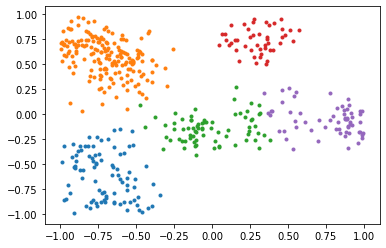

In [13]:
# your code goes here
def euclidean_dist2(lst1, lst2):
    #print(lst1, lst2)
    return np.sqrt(np.power(lst1[0] - lst2[0], 2) + np.power(lst1[1] - lst2[1], 2))
# We need to make a scatter plot for our clusters using a different color for each different cluster. 
# We need to calc the Cohesion and Separation 
clusters = k_means_clustering(data, 5)

for centroid in clusters.keys():
    cluster = clusters[centroid]
    npy_data = np.asarray(cluster)
    plt.scatter(npy_data[:,0], npy_data[:,1], marker='.')
plt.show()


Q6. Find the best k for this dataset by plotting SSE vs k for k = 1-10. Based on your plot, which value of k would you choose and why?

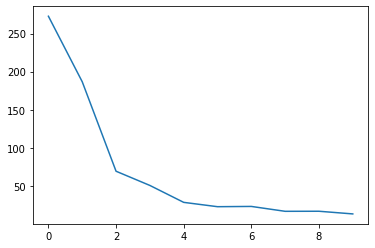

In [17]:
# your code goes here
import matplotlib.pyplot as plt

SSE_list = []
for i in range(1, 11):
    copy_data = data
    clusters = k_means_clustering(copy_data, i)
    SSE = 0
    for centroid in list(clusters.keys()):
        SSE_Cluster = 0
        for point in clusters.get(centroid):
            SSE_Cluster += np.power(euclidean_dist2(point, centroid), 2)
        SSE += SSE_Cluster
    SSE_list.append(SSE)
    
plt.plot(SSE_list)
plt.show()

## Part 2: Implement DBSCAN

For this part you'll be implementing DBSCAN, one of the most popular density based clustering algorithms.

<class 'numpy.ndarray'>


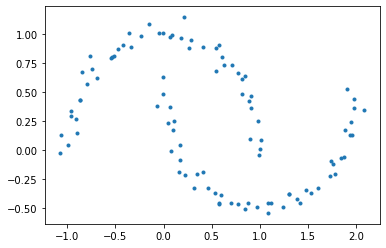

In [18]:
# Get data from file
data = np.genfromtxt("data_dbscan.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')
print(type(data))

Q7. First, run your `k_means_clustering` with `k = 2` on this dataset and display the output clusters - make sure that different clusters are marked with different colors. What do you observe? (Answer as a comment.)

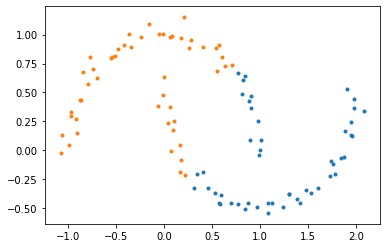

In [19]:
# your code goes here

clusters = k_means_clustering(data, 2)

for centroid in clusters.keys():
    cluster = clusters[centroid]
    npy_data = np.asarray(cluster)
    plt.scatter(npy_data[:,0], npy_data[:,1], marker='.')
plt.show()

Q8. Implement the DBSCAN algorithm and display the output clusters. 

There is a  pseudocode version of the DBSCAN algorithm on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) that you are welcome to follow. If you are not familiar with the 'continue' statement in coding, then please take a look at [this](https://www.tutorialspoint.com/python/python_loop_control.htm). Also note that a set is actually not the best data structure to use when implementing this in Python. Just use this pseudocode as scaffolding - you may need to make specific implementation changes to it! 

Run your DBSCAN clustering on the data with eps = 0.28 and minPts = 8. Plot the resulting clusters with each cluster, and noise, indicated by different colors. 

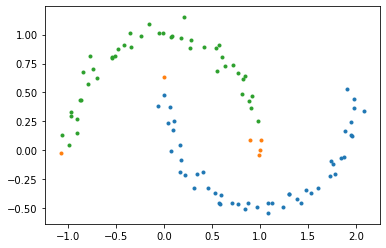

In [20]:
# your code goes here

# Just look at the Wiki
def DBSCAN(data, eps, minPts) :
    DB = []
    for point in data: 
        new_point = DB_Point(point[0], point[1])
        DB.append(new_point)
        
    C = 0                                                 
    for P in DB :
        if not P.label is None:
            continue              
        N = RangeQuery(DB, P, eps)    
        if len(N) + 1 < minPts:                         
            P.label = -1                               
            continue
        
        C = C + 1                                          
        P.label = C
        S = N 
        numLoops = 0
        new_neighbors = S
        while len(new_neighbors) != 0:
            S = new_neighbors
            new_neighbors = check_all_neighbors(S, C, DB, eps, minPts)
            
    DB_dict = {}
    for point in DB:
        if point.label not in DB_dict:
            DB_dict[point.label] = [[point.x, point.y]]
        else:
            DB_dict[point.label].append([point.x, point.y])
    return DB_dict

def check_all_neighbors(S, C, DB, eps, minPts): 
    new_neighbors = []
    numLoops = 0
    for Q in S:
        numLoops += 1
        if Q.label == -1:
            Q.label = C          
        if not Q.label is None:
            continue          
        Q.label = C                                   
        N = RangeQuery(DB, Q, eps)
        if len(N) + 1 >= minPts:                         
            difference = list(set(N).difference(set(S)))
            S = Union(S, N)
            for neighbor in difference:
                new_neighbors.append(neighbor)
    return new_neighbors

class DB_Point:    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.label = None
        
    def __eq__(self, obj):
        return isinstance(obj, data_point) and obj.x == self.x and obj.y == self.y
    
    def __hash__(self):
        return hash(self.x) + hash(self.y)
    
    def __str__(self):
        return "x: {}, y: {}".format(self.x, self.y) 
        
def RangeQuery(DB, P, eps) :
    Neighbors = []
    for point in DB : 
        distance = euclidean_dist(P, point)
        if distance <= eps and distance != 0:                   
            Neighbors.append(point)                    
    return Neighbors

def euclidean_dist(point_a, point_b):
    return np.sqrt(np.power(point_a.x - point_b.x, 2) + np.power(point_a.y - point_b.y, 2))

def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

DB = DBSCAN(data, .28, 8)

for label in DB.keys():
    cluster = DB[label]
    npy_data = np.asarray(cluster)
    plt.scatter(npy_data[:,0], npy_data[:,1], marker='.')
plt.show()


## Part 3: Clustering with scikit-learn and scipy

#### Data

For this part of the assigment you'll be working with the Epileptic Seizure Recognition Data Set developed at Rochester Institute of Technology. In this data set each row is a sample of the EEG recording at a different point in time. The dataset contains 179 columns, the first 178 are the EEG features while the last column represents the label y {1, 2, 3, 4, 5}. All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have an epileptic seizure. The class labels will not be used for clustering (which is an *unsupervised* task!) - they will just be used for plotting the data. The only change that was made to the original dataset was removing the first column, which contained the row indexes. You can find additional information about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition).

In [67]:
# Reading the Epileptic Seizure Data Set
dataset = pd.read_csv("data_seizure_edited.csv", header = 0)
print(dataset.shape)

#split the dataset into features and labels
labels = dataset['y']
data = dataset.drop('y', axis = 1)

dataset.head()

(11500, 179)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


#### Data scaling & dimensionality reduction with PCA
Both K-means and DBSCAN break down in high dimensions, as distance (and thus density) becomes less meaningful in high dimensions. So, before we run either of these clustering algorithms, we want to reduce the dimensionality of our dataset. Recall that it is critical to scale your data prior to running PCA. 

Q9. 
* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features (mean = 0 and variance = 1). Only standardize the the features, not the class labels! This will be required for running the principal component analysis (PCA) dimensionality reduction. Note that `StandardScaler` returns a numpy array.
* Use `sklearn.decomposition.PCA` to perform PCA on the data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many are necessary to retain 95% of the variance. 
* Use `fit_transform` to perform the dimensionality reduction. 
* Note that `fit_transform` returns a numpy array. Put your transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `data = DataFrame(pca_data)`
* Show the head of the resulting DataFrame (and make sure the dimensionality has actually been reduced).

In [68]:
# your code goes here

scaler = StandardScaler()
scaler.fit(data)
StandardScaler()

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(data)
PCA(n_components=0.95, svd_solver='full')
pcaData = pca.fit_transform(data)
reducedData = pd.DataFrame(pcaData)
reducedData.head()


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-91.353449,-184.251674,115.333455,15.324265,-0.094027,-203.062471,50.461968,89.583064,432.788869,-224.705594,...,102.641563,-397.201910,140.222117,-58.407019,-34.945802,-36.467722,-164.126621,-59.010773,35.158403,-17.571799
1,-313.252394,-474.852194,966.017585,1340.554947,768.241774,673.039824,626.988942,-532.987045,763.130677,2392.418687,...,-1342.818345,-1215.190476,502.576192,-665.210005,-313.878842,348.897111,449.904085,-34.652927,147.062877,-661.123272
2,91.074911,-42.218007,121.638616,-137.289331,264.927267,-198.028103,-180.823429,-259.481257,-70.528763,-219.791160,...,-8.514575,-13.082225,174.191262,80.324108,93.600556,70.844429,-83.621680,-3.505694,-34.902464,7.177979
3,-10.594470,48.420698,-57.311610,-69.607339,264.583144,-447.094813,-185.286865,-511.065285,-17.381031,-263.243626,...,-51.126486,22.870911,-5.909572,-5.053685,32.536039,-25.724567,8.975873,17.735898,29.849065,25.947104
4,-35.725708,16.513221,86.006956,-79.153082,16.028203,-51.724671,-49.597476,71.224870,-17.036229,77.779669,...,-57.655315,-52.799730,-22.054682,-52.350303,-28.682328,-22.074343,47.261192,-141.962309,115.023997,-10.788121


Q10. You are provided code here to plot the data. This code randomly samples 300 rows from the entire dataset, then uses `sklearn.manifold.MDS` to project the data onto 2 dimensions, and plots it on a scatter plot. (Manifold Learning is another form of dimensionality reduction. It essentially "unrolls" the data onto fewer dimensions. For a simple, visual example, see the first image [here](https://www.researchgate.net/figure/Dimensionality-reduction-effect-over-a-Swiss-roll-manifold-Resultant-embedded-data-is-an_fig1_286926602).) 

The points will be marked with appropriate colors based on their labels. This is the only times labels will be used. (This plot will change each time you re-run this cell due to the random selection of 300 data points. This downsampling is to save time.)

* Pass your dataset (that has been reduced in dimensions from Q9) and the labels into this scatter function. Verify that the plot looks like 2 clusters: an inner cluster (non-seizure patients, labels 2-5, will be blue/green/yellow), and an outer cluster (seizure patients, label 1, will be purple).

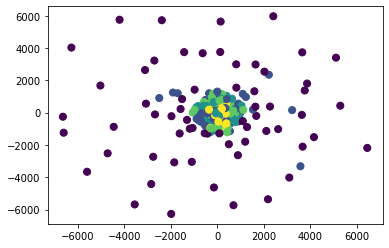

In [69]:
# do not change this plotting function!
def scatter(data, labels, numPoints = 300):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data.iloc[:, :-1])
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

# your code goes here
scatter(reducedData, labels)

#### Clustering with DBSCAN

Recall that for DBSCAN, we need to select an Eps and a MinPts. If we choose MinPts to be 4, then Eps can be selected by plotting the distance of every point to its 4th nearest neighbor and finding the "bend" in the graph. 

Q11. Find the optimal Eps for this dataset by plotting the distances of every point to its 4th nearest neighbor.
* Use `sklearn.neighbors.NearestNeighbors` with `n_neighbors=4`. Call `fit` on your data.
* Use the `kneighbors` method to find the distance of each point to its 4th nearest neighbor. Note that `kneighbors` returns two values. The first return value is a matrix of distances from each point to its k nearest neighbors. For example: 

Sklearn considers the distance from the point to itself as the closest neighbor (a distance of 0), then if the point is a distance of 2.5 away from its second nearest neighbor, a distance of 3.7 away from its third nearest neighbor, and a distance of 4.2 away from its fourth nearest neighbor, the row in the distance matrix for this point would look like: `[0, 2.5, 3.7, 4.2]`, indicating that 4.2 is the distance from this point to it's 4th nearest neighbor. 

* Plot the distance of every point to its 4th nearest neighbor. Be sure to sort the distances before you plot them. You can use `plt.plot(distances)` then `plt.show()` to plot them. 
* Use the plot to determine the best Eps for this dataset (just eyeball it).

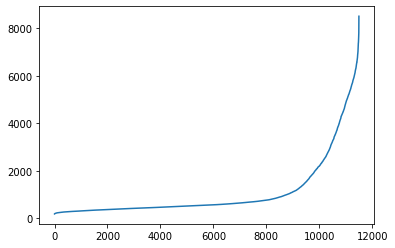

In [73]:
# your code goes here
nearestNeighbors = NearestNeighbors(n_neighbors=4)
nearestNeighbors.fit(reducedData)
NearestNeighbors(n_neighbors=4)

neigh_matrix = nearestNeighbors.kneighbors(reducedData)
distNeigh = neigh_matrix[0]
distances = distNeigh[:,3]
sortedDist = np.sort(distances)
plt.plot(sortedDist)
plt.show()

Q12. 
* Using MinPts=4 and Eps=the distance you determined from Q11, cluster the data using `sklearn.cluster.DBSCAN`. Call `fit_predict` on your data and store the return value (the predicted cluster label for each data point). Note that the returned type is a numpy array. 
* Use the provided `scatter` function (Q10) to plot the resulting clusters. You will need to convert the numpy array of predicted labels to a `Series` in order to pass it in to `scatter`.

In [ ]:
# your code goes here

#### Clustering with K-means

Q13. 
* Use `sklearn.cluster.KMeans` to cluster this data using K means. Try values of k from 2 to 5. You will need to call `fit_predict` on your data and store the return value (the predicted cluster label for each data point). Note that the returned type is a numpy array. 
* Use `sklearn.metrics.silhouette_score` to evaluate which is the best number of clusters for this dataset. Note that you will need to cast the numpy array to a Series in order to pass it in to `silhouette_score`.
* Use the provided `scatter` function (Q10) to plot the clustering that resulted in the best shilhouette score.

In [ ]:
# your code goes here

Q14. What do you observe about the results of DBSCAN vs the results of K-means? Answer as a comment.

In [ ]:
'''
Your answer goes here.
'''

#### Hierarchical Clustering

For hierarchical clustering (Q15 and Q16), you'll work with just a sample of 115 datapoints. (This is because hierarchical clustering is expensive in both time and space.) The function to downsample the data is provided here for you.

In [ ]:
# Do not change the code in this cell
# stratified sampling of the data
def downsample_data(data):
    downData = None
    downLabels = None

    kfold = StratifiedKFold(n_splits = 100)
    for throwAway_index, subsample_index in kfold.split(data, labels):
        downData = data.iloc[subsample_index]
        downLabels = labels.iloc[subsample_index]
        break
    
    print(downData.shape)
    return downData

Q15. Use Scipy's hierarchical clustering (`scipy.cluster.hierarchy`) to cluster the data using different linkage methods. **Make sure you are using a down-sampled dataset by passing your dataset into the provided downsample_data() function.**

* Try all of these linkage methods: `single`, `complete`, `average`, `centroid`, `ward`
* Note that the return value of the clustering is a linkage matrix (a cophenetic distance matrix)

* Calculate the CPCC of each linkage method to determine which method worked best. Use `scipy.cluster.hierarchy.cophenet` for this. You'll pass in the linkage matrix from the clustering, and a proximity matrix that contains the actual distances between each point, which you can get by using `scipy.spatial.distance.pdist`. 

In [ ]:
# Make sure to pass your dataset into downsample_data() 
# and use the resulting smaller dataset for hierachical clustering

# Pass the down-sampled dataset into pdist to get your proximity matrix for calculating CPCC
proximity_matrix = pdist(sampled_dataset_goes_here)

# the rest of your code goes here

Q16. Using the best linkage method that you found in Q15, plot the dendrogram with `scipy.cluster.hierarchy.dendrogram`. 

In [ ]:
# your code goes here

#### Anomaly Detection (AD)

Anomaly detection (AD) algorithms can be broadly classified into 3 classes:
- Supervised AD (labels available for both normal data and anomalies)
- Semi-supervised AD, also called Novelty Detection (only normal data is available to train on)
- Unsupervised AD, also called Outlier Detection (no labels are provided)

In this part you'll experiment with 4 datasets and compare 4 different outlier detection (Unsupervised AD) methods.

In [14]:
# loading the datasets
filenames = ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv']
datasets = [np.loadtxt(fname, delimiter=', ') for fname in filenames]
for fname, data in zip(filenames, datasets):
    print (fname, data.shape)

data1.csv (445, 2)
data2.csv (314, 2)
data3.csv (419, 2)
data4.csv (441, 2)


Q17. Detect the outliers in all 4 datasets using the following algorithms:
- `sklearn.covariance.EllipticEnvelope` - a statistical-based AD method
- `sklearn.ensemble.IsolationForest` - an isolation-based AD method
- `sklearn.neighbors.LocalOutlierFactor` - a density-based AD method
- `sklearn.svm.OneClassSVM` - a model-based AD method

Create scatterplots that show the outliers detected in each dataset with each method. (16 plots in total.)

The following plotting function is provided for you. You should pass in a list of y_pred values corresponding to all 16 of your plots. In order for this plotting function to work correctly, the order of your list should be: Dataset1 with ElipticEnvelope, Dataset1 with IsolationForest, Dataset1 with LocalOutlierFactor, Dataset1 with One-Class SVM, Dataset2 with EE, Dataset2 with IF, Dataset2 with LOF, Dataset2 with SVM, DS3 with EE, DS3 with IF, DS3 with LOF, DS3 with SVM, DS4 with EE, DS4 with IF, DS4 with LOF, DS4 with SVM.

In [ ]:
# Do not change the code in this cell!
# Create all 16 anomaly detection plots
def plot_all(y_preds):
    
    print("len(y_preds):", len(y_preds))
    
    names = ['Robust Covariance', 'Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']
    plt.figure(figsize=(len(names) * 2 + 3, 12.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
    plot_num = 1
    
    for i_dataset in range(len(datasets)):
        for j_algorithm in range(len(names)):
            
            plt.subplot(len(datasets), len(names), plot_num)
            if i_dataset == 0:
                plt.title(names[j_algorithm], size=18)

            colors = np.array(['#377eb8', '#ff7f00'])
            plt.scatter(datasets[i_dataset][:, 0], datasets[i_dataset][:, 1], 
                        s=10, color=colors[(y_preds[plot_num-1] + 1) // 2])

            plt.xlim(-7, 7)
            plt.ylim(-7, 7)
            plt.xticks(())
            plt.yticks(())
            
            plot_num += 1

    plt.show()

Directions:
* Use a `contamination` (or `nu` for `OneClassSVM`) of 0.25.
* For the `OneClassSVM` use `rbf` kernel.
* NOTE: To preform AD in an unsupervised way, you will pass the same dataset into `fit` and `predict.`

Some code is provided here to get you started.

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


outliers_fraction = 0.25

#this will be your list of y_preds for the 16 plots
y_pred_list = list()

#for each of the 4 datasets
for X in datasets:
    
    #apply EllipticEnvelope AD
    #append resulting y_pred to y_pred_list
    
    #apply IsolationForest AD
    #append resulting y_pred to y_pred_list
    
    #apply LocalOutlierFactor AD
    #append resulting y_pred to y_pred_list

    #apply OneClassSVM AD
    #append resulting y_pred to y_pred_list

 

plot_all(y_pred_list)